In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../dataset/dataset_train.csv")

# Clean data

In [78]:

remove_columns = [
    "Index", "First Name", "Last Name", "Birthday", "Best Hand",
    "Potions", "Care of Magical Creatures", "Charms", "Flying",
    "Defense Against the Dark Arts","Arithmancy"
]
data.drop(columns=remove_columns, inplace=True)
data
test = data

# Deal with missing data

Claude recommandation:
- Missing data is only ~2% (very small)
- Standard deviation is extremely high (suggests outliers)

Use MEDIAN imputation 

Note:
Mean (Average) -  Sum of all values divided by the count
Median - The middle value when data is sorted

✅ Median works well for BOTH low and high std
✅ Mean works well ONLY for low std (and normal distribution)

In [79]:
data.describe()

,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration
count,1568.000000,1567.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000
mean,39.797131,1.141020,3.153910,-224.589915,495.747970,2.963095,1030.096946
std,520.298268,5.219682,4.155301,486.344840,106.285165,4.425775,44.125116
min,-966.740546,-10.295663,-8.727000,-1086.496835,283.869609,-8.858993,906.627320
25%,-489.551387,-4.308182,3.099000,-577.580096,397.511047,2.218653,1026.209993
50%,260.289446,3.469012,4.624000,-419.164294,463.918305,4.378176,1045.506996
75%,524.771949,5.419183,5.667000,254.994857,597.492230,5.825242,1058.436410
max,1016.211940,11.612895,10.032000,1092.388611,745.396220,11.889713,1098.958201


In [80]:
for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]):
        data[col] = data[col].fillna(data[col].median())

test = data
data.describe()


,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,44.206977,1.189034,3.189743,-228.846229,495.051696,3.001125,1030.424410
std,515.990486,5.176132,4.110574,481.834520,105.218634,4.371858,43.710042
min,-966.740546,-10.295663,-8.727000,-1086.496835,283.869609,-8.858993,906.627320
25%,-487.186182,-4.240468,3.166500,-574.340230,398.531485,2.435711,1027.005526
50%,260.289446,3.469012,4.624000,-419.164294,463.918305,4.378176,1045.506996
75%,519.468857,5.387506,5.635250,238.853148,596.934093,5.757083,1058.153274
max,1016.211940,11.612895,10.032000,1092.388611,745.396220,11.889713,1098.958201


# Convert Category into numerical representation 
## (Using One-Hot Encoding)

In [81]:
houses = list(set(data["Hogwarts House"]))
lookup = {}

for i,h in enumerate(houses):
    lookup[h] = i

# Create one-hot encoded matrix
one_hot = np.zeros((len(data), len(houses)), dtype=np.uint8)

for i in range(len(data)):
    house = data["Hogwarts House"].iloc[i]
    one_hot[i, lookup[house]] = 1

# Convert to DataFrame with proper column names
one_hot_df = pd.DataFrame(one_hot, columns=houses, index=data.index)

# Insert after 'Hogwarts House' column
house_col_index = data.columns.get_loc("Hogwarts House")

# Split dataframe and insert one-hot columns
data = pd.concat([
    data.iloc[:, :house_col_index + 1],  # Up to and including 'Hogwarts House'
    one_hot_df,                           # One-hot encoded columns
    data.iloc[:, house_col_index + 1:]   # Rest of the columns
], axis=1)


data.drop('Hogwarts House', axis=1, inplace=True)
data

,Hufflepuff,Ravenclaw,Slytherin,Gryffindor,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration
0,0,1,0,0,-487.886086,5.727180,4.722,272.035831,532.484226,5.231058,1039.788281
1,0,0,1,0,-552.060507,-5.987446,-5.612,-487.340557,367.760303,4.107170,1058.944592
2,0,1,0,0,-366.076117,7.725017,6.140,664.893521,602.585284,3.555579,1088.088348
3,0,0,0,1,697.742809,-6.497214,4.026,-537.001128,523.982133,-4.809637,920.391449
4,0,0,0,1,436.775204,-7.820623,2.236,-444.262537,599.324514,-3.444377,937.434724
...,...,...,...,...,...,...,...,...,...,...,...
1595,0,0,0,1,354.280086,-4.541837,5.702,-497.235066,618.220213,-5.231721,964.219853
1596,0,0,1,0,367.531174,6.061064,1.757,-643.271092,445.827565,2.238112,1056.147366
1597,0,0,0,1,544.018925,-3.203269,6.065,-385.150457,635.211486,-5.984257,953.866685
1598,1,0,0,0,453.676219,3.442831,6.738,-831.741123,383.444937,3.813111,1087.949205


# Feature normalization (Z-Score / Standard Scaling)

In [82]:
courses = data.columns[4:]

means = []
stds = []

for course in courses:
    mean = data[course].mean()
    std = data[course].std()

    means.append(mean)
    stds.append(std)

    data[course] = (data[course] - mean) / std

data

,Hufflepuff,Ravenclaw,Slytherin,Gryffindor,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration
0,0,1,0,0,-1.031207,0.876745,0.372760,1.039531,0.355760,0.510065,0.214227
1,0,0,1,0,-1.155578,-1.386456,-2.141244,-0.536479,-1.209780,0.252992,0.652486
2,0,1,0,0,-0.795137,1.262716,0.717724,1.854869,1.022001,0.126823,1.319238
3,0,0,0,1,1.266566,-1.484941,0.203440,-0.639545,0.274955,-1.786600,-2.517338
4,0,0,0,1,0.760805,-1.740616,-0.232022,-0.447075,0.991011,-1.474316,-2.127422
...,...,...,...,...,...,...,...,...,...,...,...
1595,0,0,0,1,0.600928,-1.107173,0.611169,-0.557015,1.170596,-1.883146,-1.514630
1596,0,0,1,0,0.626609,0.941249,-0.348551,-0.860098,-0.467827,-0.174528,0.588491
1597,0,0,0,1,0.968646,-0.848569,0.699478,-0.324394,1.332081,-2.055278,-1.751491
1598,1,0,0,0,0.793560,0.435421,0.863202,-1.251249,-1.060713,0.185730,1.316054


Ensure Vector shape is correct

- n = number of feature = 7
- m = rows of data = 1600

- W (n x 1) = (7 x 1)
- b single parameter
- X (n x m) = (7 x 1600)
- Y (1 x m) = (1 x 1600)

In [83]:
def model(W, b, X):
    z = np.dot(W, X) + b 
    return 1 / (1 + np.exp(-z))

def loss(y_predict, Y, m):
    # Add small epsilon to avoid log(0)
    epsilon = 1e-15
    y_predict = np.clip(y_predict, epsilon, 1 - epsilon)
    return -(1/m) * np.sum(Y * np.log(y_predict) + (1 - Y)*np.log(1-y_predict))

def gradient_w(y_predict, Y, X, m):
    return (1/m) * np.dot((y_predict - Y), X.T)  # Fixed sign

def gradient_b(y_predict, Y, m):
    return (1/m) * np.sum(y_predict - Y)  # Fixed sign

def train(X, Y, learn_rate = 0.01, iteration=1000000, converge_limit = 0.00001):
    b = 0.0
    W = np.zeros(7)
    m = len(Y)
    cost = []

    for i in range(iteration):
        if i % 100 == 0:
            print(f"Iteration = {i}, Cost = {cost[-1] if cost else 'N/A'}")
            print(f"W norm: {np.linalg.norm(W):.6f}, b: {b:.6f}")
            print("----------------------------------------")

        y_predict = model(W, b, X)
        current_cost = loss(y_predict, Y, m)
        cost.append(current_cost)

        gW = gradient_w(y_predict, Y, X, m)
        gb = gradient_b(y_predict, Y, m)

        # Store previous values for convergence check
        W_prev = W.copy()
        b_prev = b

        W = W - learn_rate * gW
        b = b - learn_rate * gb

        # Check if change is small
        if (np.all(np.abs(gW) <= converge_limit) and 
            np.abs(gb) <= converge_limit):
            print(f"Loss Function converged at iter = {i} 👍")
            return W, b, cost
    
    print(f"Training stopped at iter = {i}. Didn't converge")
    return W, b, cost


In [84]:
x_train = np.array(data.iloc[:, 4:])
x_train = x_train.T


y_train_Gryffindor = np.array(data["Gryffindor"])
y_train_Hufflepuff = np.array(data["Hufflepuff"])
y_train_Slytherin = np.array(data["Slytherin"])
y_train_Ravenclaw = np.array(data["Ravenclaw"])

W1, b1, cost1 = train(x_train, y_train_Gryffindor)


Iteration = 0, Cost = N/A
W norm: 0.000000, b: 0.000000
----------------------------------------
Iteration = 100, Cost = 0.402471503655669
W norm: 0.466628, b: -0.261066
----------------------------------------
Iteration = 200, Cost = 0.28333146217020294
W norm: 0.742869, b: -0.462786
----------------------------------------
Iteration = 300, Cost = 0.2208767730764489
W norm: 0.932960, b: -0.622739
----------------------------------------
Iteration = 400, Cost = 0.1829146484191923
W norm: 1.075802, b: -0.753972
----------------------------------------
Iteration = 500, Cost = 0.157612598070235
W norm: 1.189136, b: -0.864763
----------------------------------------
Iteration = 600, Cost = 0.13965029535403983
W norm: 1.282413, b: -0.960417
----------------------------------------
Iteration = 700, Cost = 0.12629858150652967
W norm: 1.361230, b: -1.044469
----------------------------------------
Iteration = 800, Cost = 0.11602042788186573
W norm: 1.429162, b: -1.119369
----------------------

In [85]:
W2, b2, cost2 = train(x_train, y_train_Hufflepuff)


Iteration = 0, Cost = N/A
W norm: 0.000000, b: 0.000000
----------------------------------------
Iteration = 100, Cost = 0.45080984695064164
W norm: 0.467746, b: -0.150246
----------------------------------------
Iteration = 200, Cost = 0.3300383580985228
W norm: 0.791590, b: -0.269259
----------------------------------------
Iteration = 300, Cost = 0.26215351079259813
W norm: 1.031781, b: -0.366374
----------------------------------------
Iteration = 400, Cost = 0.21967237005188875
W norm: 1.220017, b: -0.447992
----------------------------------------
Iteration = 500, Cost = 0.1909271004945844
W norm: 1.373583, b: -0.518291
----------------------------------------
Iteration = 600, Cost = 0.17032479853650506
W norm: 1.502626, b: -0.580040
----------------------------------------
Iteration = 700, Cost = 0.1549026069118281
W norm: 1.613510, b: -0.635129
----------------------------------------
Iteration = 800, Cost = 0.14296159095430866
W norm: 1.710458, b: -0.684896
-------------------

In [86]:
W3, b3, cost3 = train(x_train, y_train_Slytherin)


Iteration = 0, Cost = N/A
W norm: 0.000000, b: 0.000000
----------------------------------------
Iteration = 100, Cost = 0.4523430922711388
W norm: 0.403929, b: -0.276403
----------------------------------------
Iteration = 200, Cost = 0.33222524499591854
W norm: 0.670682, b: -0.493858
----------------------------------------
Iteration = 300, Cost = 0.2634232818827218
W norm: 0.863871, b: -0.669250
----------------------------------------
Iteration = 400, Cost = 0.21958272497735798
W norm: 1.013307, b: -0.814679
----------------------------------------
Iteration = 500, Cost = 0.18950472553730435
W norm: 1.134231, b: -0.938192
----------------------------------------
Iteration = 600, Cost = 0.16773003438704462
W norm: 1.235281, b: -1.045165
----------------------------------------
Iteration = 700, Cost = 0.15131279227469682
W norm: 1.321767, b: -1.139293
----------------------------------------
Iteration = 800, Cost = 0.1385361017915173
W norm: 1.397164, b: -1.223194
-------------------

In [87]:
W4, b4, cost4 = train(x_train, y_train_Ravenclaw)

Iteration = 0, Cost = N/A
W norm: 0.000000, b: 0.000000
----------------------------------------
Iteration = 100, Cost = 0.41807132885751463
W norm: 0.482491, b: -0.197575
----------------------------------------
Iteration = 200, Cost = 0.29892465588527783
W norm: 0.787463, b: -0.352193
----------------------------------------
Iteration = 300, Cost = 0.2360587879666386
W norm: 1.003351, b: -0.476178
----------------------------------------
Iteration = 400, Cost = 0.19803353503461246
W norm: 1.167974, b: -0.578624
----------------------------------------
Iteration = 500, Cost = 0.17287984059451703
W norm: 1.299757, b: -0.665516
----------------------------------------
Iteration = 600, Cost = 0.1551644690515011
W norm: 1.408872, b: -0.740791
----------------------------------------
Iteration = 700, Cost = 0.142097974559568
W norm: 1.501471, b: -0.807115
----------------------------------------
Iteration = 800, Cost = 0.13211329232245717
W norm: 1.581540, b: -0.866354
--------------------

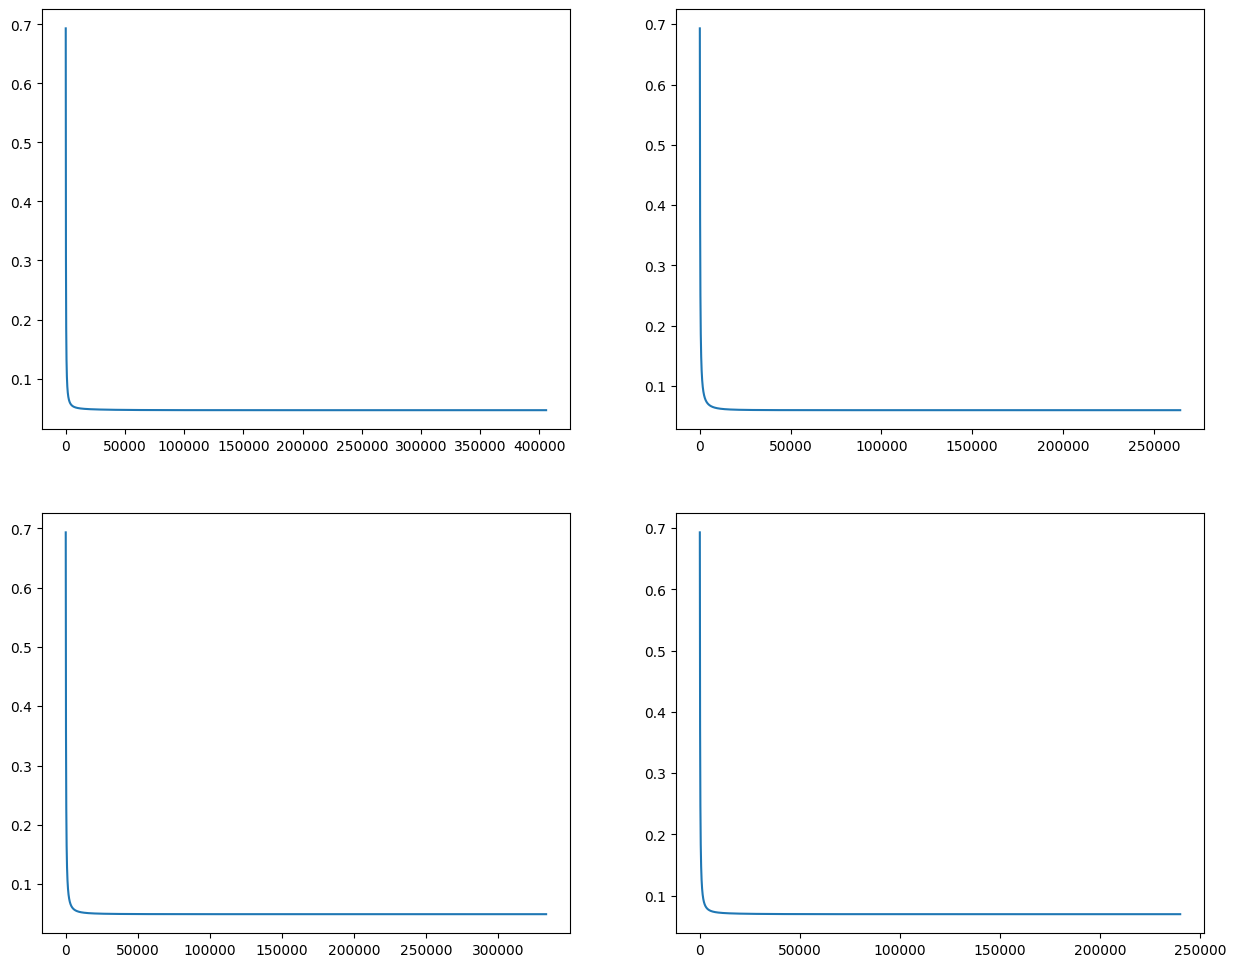

In [88]:
fig, ax = plt.subplots(2,2, figsize=(15,12))

ax[0,0].plot(range(len(cost1)), cost1)
ax[0,1].plot(range(len(cost2)), cost2)
ax[1,0].plot(range(len(cost3)), cost3)
ax[1,1].plot(range(len(cost4)), cost4)

In [89]:
W_all = np.array([W1, W2, W3, W4])
b_all = np.array([[b1, b2, b3, b4]]).T

W_all = W_all / np.std(x_train)
b_all
print(W1)


[ 0.8115521  -1.79041641  1.56517728 -0.06203519  1.09778814 -0.77676189
 -1.23784591]


In [90]:
print(W_all)
print(W_all.shape)
print(b_all)
print(b_all.shape)


[[ 0.81180583 -1.79097618  1.56566662 -0.06205458  1.09813136 -0.77700475
  -1.23823292]
 [ 2.12209126  1.95554597  1.01323346 -1.3177943  -2.09521117  0.69281374
   0.32732668]
 [-1.51281696 -1.71396026 -1.77948484 -0.47979163 -0.84333151  0.32940094
   1.51315074]
 [-1.85591063  1.44739309  0.31380221  1.11320352  1.73486571  0.41801957
  -0.05589452]]
(4, 7)
[[-3.61580397]
 [-2.6272011 ]
 [-3.76514158]
 [-2.55239239]]
(4, 1)


In [91]:
means = np.array(means)  # shape (7,)
stds = np.array(stds)    # shape (7,)

W_denorm = W_all / stds
b_denorm = b_all - np.dot(W_all, means / stds).reshape(4, 1)

In [92]:

x_test = np.array([[354.280086, -4.541837, 5.702, -497.235066, 618.220213, -5.231721, 964.219853]]).T
print(x_test.shape)

y_predict = model(W_denorm, b_denorm, x_test)
print(houses[np.argmax(y_predict)])


(7, 1)
Hufflepuff


In [93]:
test

,Hogwarts House,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration
0,Ravenclaw,-487.886086,5.727180,4.722,272.035831,532.484226,5.231058,1039.788281
1,Slytherin,-552.060507,-5.987446,-5.612,-487.340557,367.760303,4.107170,1058.944592
2,Ravenclaw,-366.076117,7.725017,6.140,664.893521,602.585284,3.555579,1088.088348
3,Gryffindor,697.742809,-6.497214,4.026,-537.001128,523.982133,-4.809637,920.391449
4,Gryffindor,436.775204,-7.820623,2.236,-444.262537,599.324514,-3.444377,937.434724
...,...,...,...,...,...,...,...,...
1595,Gryffindor,354.280086,-4.541837,5.702,-497.235066,618.220213,-5.231721,964.219853
1596,Slytherin,367.531174,6.061064,1.757,-643.271092,445.827565,2.238112,1056.147366
1597,Gryffindor,544.018925,-3.203269,6.065,-385.150457,635.211486,-5.984257,953.866685
1598,Hufflepuff,453.676219,3.442831,6.738,-831.741123,383.444937,3.813111,1087.949205


In [94]:
x_validate = np.array(test.iloc[:, 1:])
x_validate = x_validate.T
y_validate = test["Hogwarts House"]

print(x_validate.shape)
print(y_validate.shape)

(7, 1600)
(1600,)


In [95]:
def validate(W, b, X, v):
    y_predict = model(W, b, X)
    predicted_idx = np.argmax(y_predict, axis=0)
    predict = []

    count = 0
    for i, k in enumerate(predicted_idx):
        predict.append(houses[k])
        if (houses[k] == v[i]):
            count += 1
    
    accuracy = count * 100 / len(predicted_idx)
    print(f"The accuracy is {accuracy:.2f}")
    df = pd.DataFrame({'Hogwarts House': predict})
    df.index.name = "Index"
    df.to_csv("house.csv", index=True)

validate(W_denorm, b_denorm, x_validate, y_validate)

The accuracy is 19.00
